In [1]:
!pip install --upgrade pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 4.1 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-2.0.1-py3-none-any.whl size=193267 sha256=334e2b7ab0f29805eb6f56c3e7ba94f0309e1aa42aec577c895b239f0b39ba76
  Stored in directory: /root/.cache/pip/wheels/94/75/88/b853cf33b0053b0a001dca55b74d515048b7656e736364eb57
Successfully built pyod


## 2. Importing of the libraries

In [6]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import shap
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
from keras.models import Model, Sequential
from keras.layers import Input, Dense
from keras.optimizers import Adam
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [3]:
# Suppress warnings
warnings.filterwarnings("ignore")

## 3. Loading of the dataset

In [7]:
df = pd.read_csv('/kaggle/input/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

(284807, 31)

### 4 Exploration of dataset and visualization

In [30]:
# Checking the missing values 
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [31]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Class Counts:
Class
0    284315
1       492
Name: count, dtype: int64


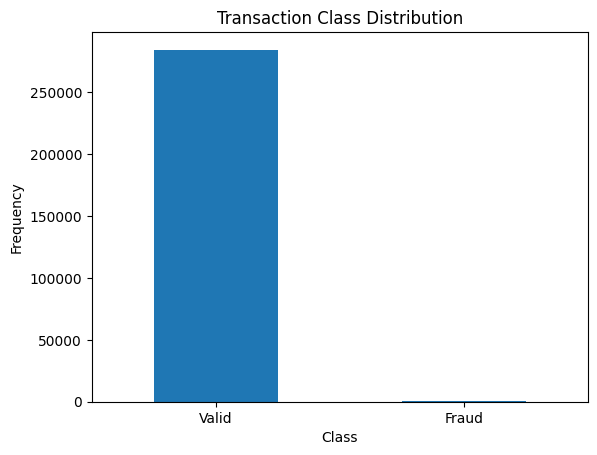

In [32]:
# Calculate the count of each class (fraudulent and valid transactions)
count_classes = pd.value_counts(df['Class'], sort=True)

# Display the count of each class
print("Class Counts:")
print(count_classes)

# Plotting the distribution of transaction classes
count_classes.plot(kind='bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), ['Valid', 'Fraud'])
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [33]:

Normal = df[df['Class']==0]
Fraud = df[df['Class']==1]

In [34]:
Normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [35]:
Fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

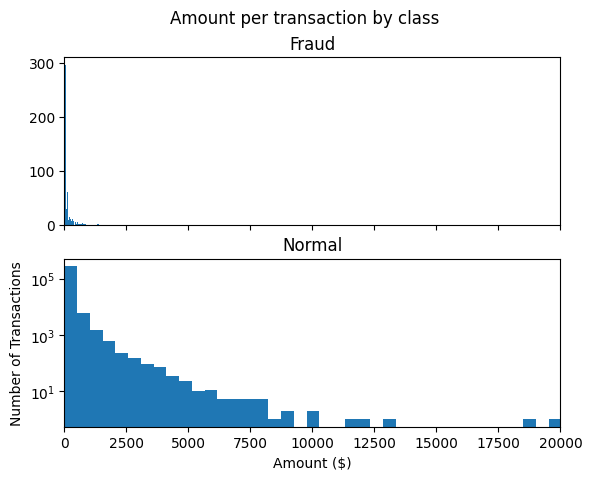

In [36]:
#Let's have a more graphical representation of the data

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(Fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(Normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

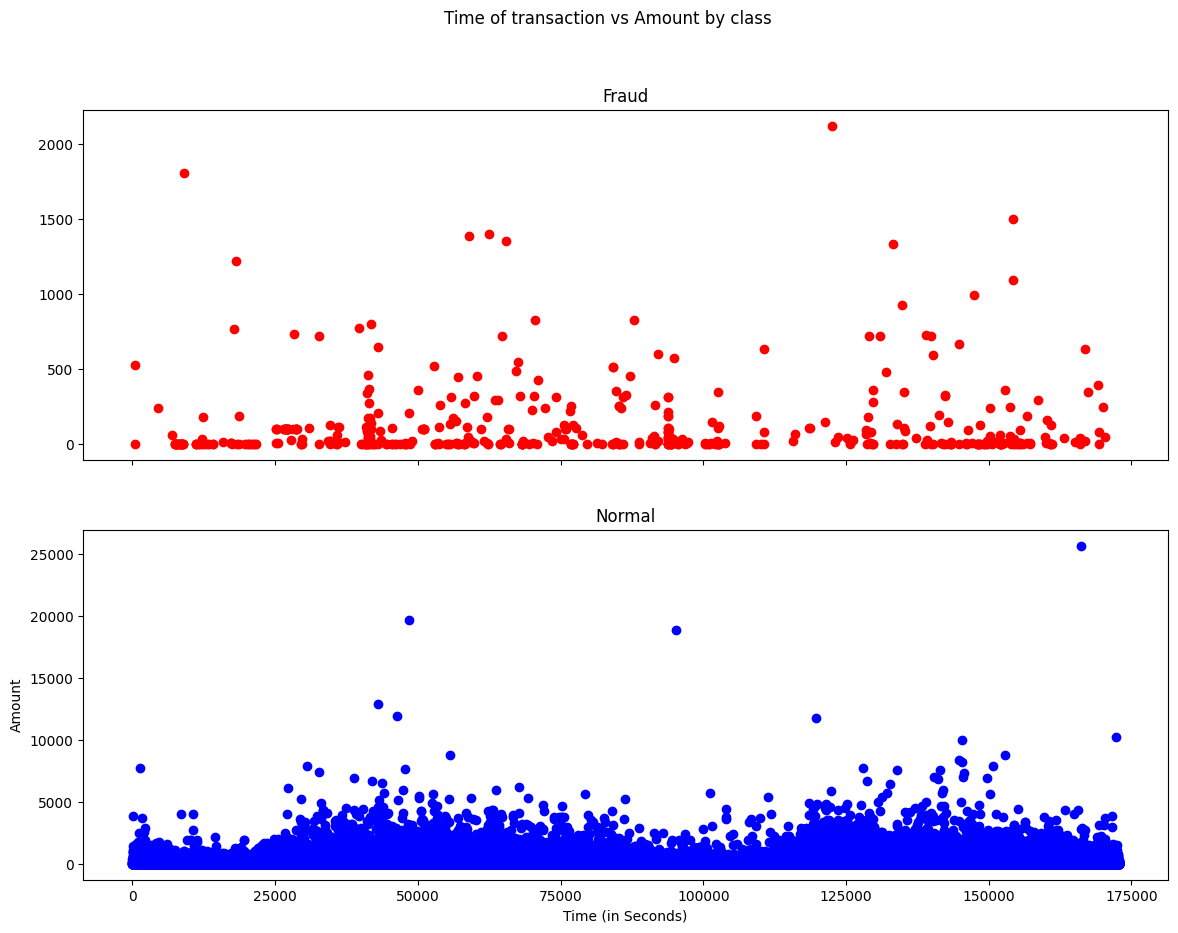

In [37]:

# Plotting
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(14, 10))
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(Fraud['Time'], Fraud['Amount'], color='red')
ax1.set_title('Fraud')

ax2.scatter(Normal['Time'], Normal['Amount'], color='blue')
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')

plt.show()

### 5. Correlation 

In [38]:
# Calculate correlation matrix
corr_matrix = df.corr()
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


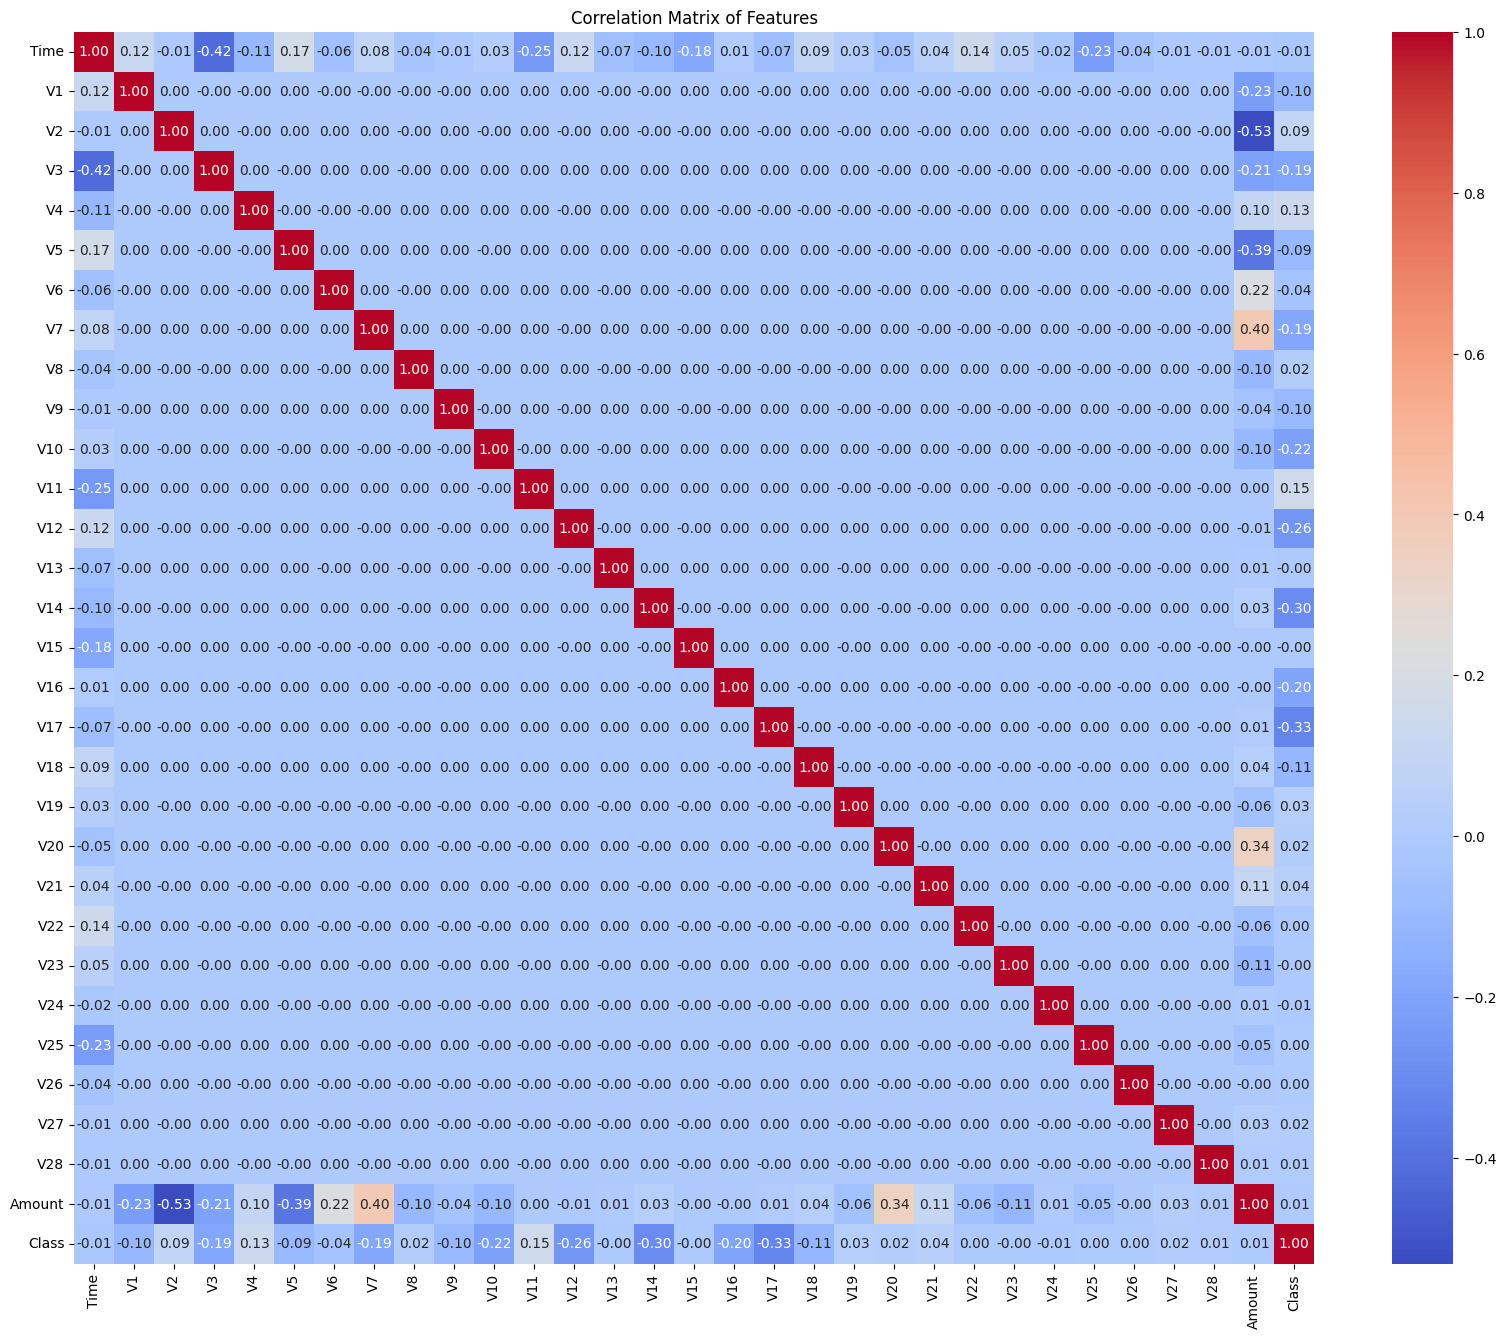

In [39]:
# Plot the heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

In [40]:
# Calculate correlation of 'Amount' and 'Class' with other features
corr_with_amount = df.corr()['Amount'].drop('Amount')
corr_with_class = df.corr()['Class'].drop('Class')

In [41]:
# Display correlations
print("Correlation with Amount:")
print(corr_with_amount)

print("\nCorrelation with Class:")
print(corr_with_class)

Correlation with Amount:
Time    -0.010596
V1      -0.227709
V2      -0.531409
V3      -0.210880
V4       0.098732
V5      -0.386356
V6       0.215981
V7       0.397311
V8      -0.103079
V9      -0.044246
V10     -0.101502
V11      0.000104
V12     -0.009542
V13      0.005293
V14      0.033751
V15     -0.002986
V16     -0.003910
V17      0.007309
V18      0.035650
V19     -0.056151
V20      0.339403
V21      0.105999
V22     -0.064801
V23     -0.112633
V24      0.005146
V25     -0.047837
V26     -0.003208
V27      0.028825
V28      0.010258
Class    0.005632
Name: Amount, dtype: float64

Correlation with Class:
Time     -0.012323
V1       -0.101347
V2        0.091289
V3       -0.192961
V4        0.133447
V5       -0.094974
V6       -0.043643
V7       -0.187257
V8        0.019875
V9       -0.097733
V10      -0.216883
V11       0.154876
V12      -0.260593
V13      -0.004570
V14      -0.302544
V15      -0.004223
V16      -0.196539
V17      -0.326481
V18      -0.111485
V19       0.034783
V

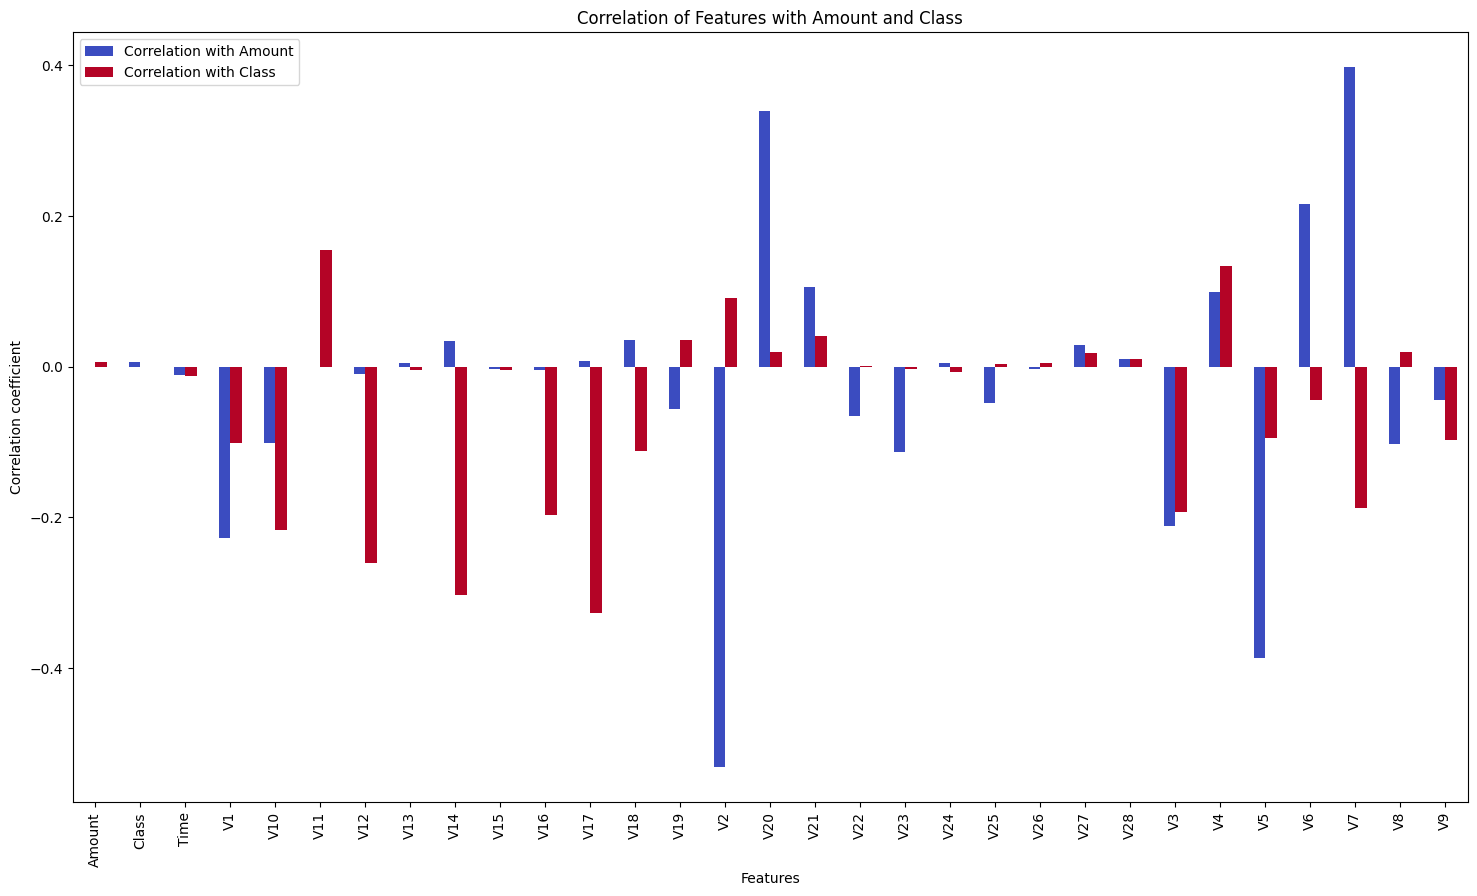

In [42]:


# Combine the correlations into a single DataFrame
correlation_df = pd.DataFrame({
    'Correlation with Amount': corr_with_amount,
    'Correlation with Class': corr_with_class
})

# Plot the correlations
correlation_df.plot(kind='bar', figsize=(18, 10), colormap='coolwarm')
plt.title('Correlation of Features with Amount and Class')
plt.ylabel('Correlation coefficient')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.show()

### 6. Visualization of Anomalies using PCA

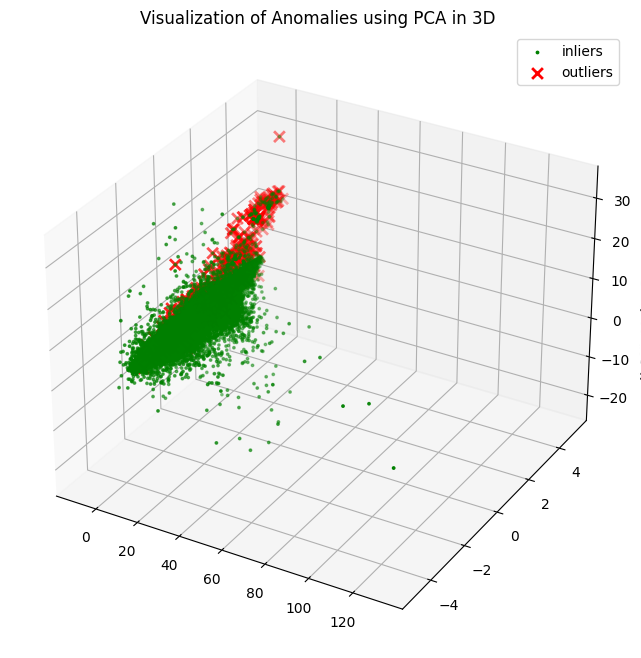

In [8]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D


# Extract the columns for modeling we are removing the class column
to_model_cols = df.columns[0:30] 

# Identify outliers based on 'Class' column
outliers = df.loc[df['Class'] == 1]
outlier_index = list(outliers.index)

# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(df[to_model_cols])

# Perform PCA to reduce to 3 components
pca = PCA(n_components=3)
X_reduce = pca.fit_transform(X)

# Plotting
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3_using_PCA")

# Plot inliers (green points)
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=3, lw=1, label="inliers", c="green")

# Plot outliers (red crosses)
ax.scatter(X_reduce[outlier_index, 0], X_reduce[outlier_index, 1], X_reduce[outlier_index, 2],
           s=60, lw=2, marker="x", c="red", label="outliers")

ax.legend()
plt.title('Visualization of Anomalies using PCA in 3D')
plt.show()


### 7. Model Building

In [9]:
X = df.drop(columns=['Class'])
y = df['Class']

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Split data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


## 7.1 Isolation forest

In [10]:
from pyod.models.iforest import IForest

# Set up the Isolation Forest model with the best parameters
iforest = IForest(contamination=0.01, max_samples=0.5, n_estimators=50)

# Fit the model on the training data
iforest.fit(X_train)

# Predict outlier scores
y_test_scores_iforest = iforest.decision_function(X_test)

# Print some example scores
print("Example test set outlier scores (Isolation Forest):")
print(y_test_scores_iforest[:10])

# Calculate ROC AUC
roc_auc_iforest = roc_auc_score(y_test, y_test_scores_iforest)
print(f'Isolation Forest ROC AUC Score: {roc_auc_iforest:.4f}')


Example test set outlier scores (Isolation Forest):
[ 0.23074636 -0.08044723 -0.0986395  -0.09140201 -0.09787421 -0.07765943
 -0.10745108 -0.08750512 -0.09167971 -0.06318296]
Isolation Forest ROC AUC Score: 0.9549


## 7.2 One-Class Support Vector Machine

In [ ]:
from pyod.models.ocsvm import OCSVM
from sklearn.metrics import roc_auc_score

# Set up the OCSVM model with the best parameters
ocsvm = OCSVM(gamma='auto', kernel='rbf', nu=0.1)

# Fit the model on the training data
ocsvm.fit(X_train)

# Predict outlier scores
y_test_scores_ocsvm = ocsvm.decision_function(X_test)

# Print some example scores
print("Example test set outlier scores (OCSVM):")
print(y_test_scores_ocsvm[:10])

# Calculate ROC AUC
roc_auc_ocsvm = roc_auc_score(y_test, y_test_scores_ocsvm)
print(f'OCSVM ROC AUC Score: {roc_auc_ocsvm:.4f}')


## 7.3 Gaussian Mixture Model

In [46]:
from pyod.models.gmm import GMM

# Set up the GMM model with the best parameters
gmm = GMM(contamination=0.001, covariance_type='full', n_components=1)

# Fit the model on the training data
gmm.fit(X_train)

# Predict outlier scores
y_test_scores_gmm = gmm.decision_function(X_test)

# Print some example scores
print("Example test set outlier scores (GMM):")
print(y_test_scores_gmm[:10])

# Calculate ROC AUC
roc_auc_gmm = roc_auc_score(y_test, y_test_scores_gmm)
print(f'GMM ROC AUC Score: {roc_auc_gmm:.4f}')


Example test set outlier scores (GMM):
[1004.88397961   40.94391168   34.34912514   33.00233863   31.06876476
   43.7735189    30.1959443    37.50120885   35.16691748   71.79509822]
GMM ROC AUC Score: 0.9598


## 7.4 Autoencoder

In [47]:
import numpy as np
import pandas as pd
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Define the autoencoder model
input_dim = X_train.shape[1]
encoding_dim = 14  
hidden_dim = int(encoding_dim / 2)

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="relu")(input_layer)
encoder = Dense(hidden_dim, activation="relu")(encoder)
decoder = Dense(hidden_dim, activation="relu")(encoder)
decoder = Dense(input_dim, activation="sigmoid")(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the autoencoder
history = autoencoder.fit(X_train, X_train, 
                          epochs=50, 
                          batch_size=32, 
                          shuffle=True, 
                          validation_split=0.2,
                          verbose=1)

# Predict the reconstruction of the test set
X_test_reconstructed = autoencoder.predict(X_test)

# Calculate reconstruction error
mse = np.mean(np.power(X_test - X_test_reconstructed, 2), axis=1)

# Print some example scores
print("Example test set reconstruction errors (Autoencoder):")
print(mse[:10])

# Calculate ROC AUC
roc_auc_autoencoder = roc_auc_score(y_test, mse)
print(f'Autoencoder ROC AUC Score: {roc_auc_autoencoder:.4f}')


Epoch 1/50
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.9460 - val_loss: 0.8552
Epoch 2/50
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.8426 - val_loss: 0.8405
Epoch 3/50
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.8165 - val_loss: 0.8311
Epoch 4/50
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.8109 - val_loss: 0.8251
Epoch 5/50
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.8129 - val_loss: 0.8209
Epoch 6/50
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.8185 - val_loss: 0.8177
Epoch 7/50
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.8064 - val_loss: 0.8156
Epoch 8/50
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.8220 - val_loss: 0.8136
Epoch 9/50
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.7951 - val_loss: 0.8126
Epoch 10/50
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.7846 - val_loss: 0.8118
Epoch 11/50
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.8171 - val_loss: 0.8111
Epoch 12/50
4985/4985 ━━━━━━━

## 8. Visualizing of results

Isolation Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     85307
           1       0.01      0.92      0.03       136

    accuracy                           0.90     85443
   macro avg       0.51      0.91      0.49     85443
weighted avg       1.00      0.90      0.95     85443

Isolation Forest Confusion Matrix:
[[76887  8420]
 [   11   125]]
GMM Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     85307
           1       0.01      0.92      0.03       136

    accuracy                           0.90     85443
   macro avg       0.51      0.91      0.49     85443
weighted avg       1.00      0.90      0.95     85443

GMM Confusion Matrix:
[[76887  8420]
 [   11   125]]
Autoencoder Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     85307
           1    

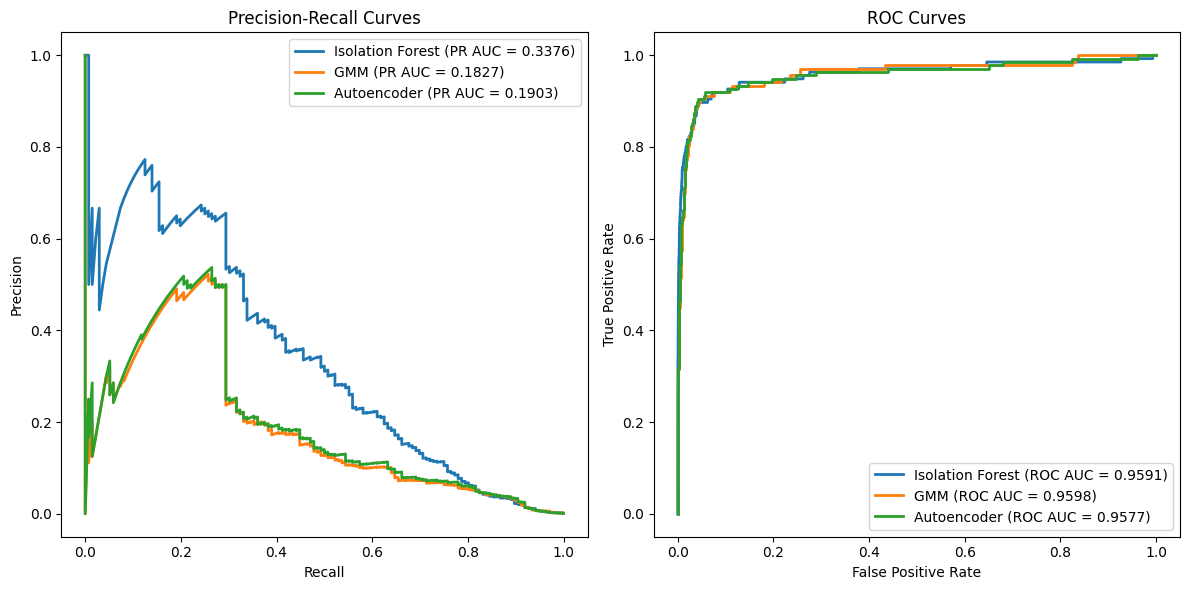

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, confusion_matrix, classification_report, auc, roc_curve, roc_auc_score

# Define a function to plot precision-recall curve
def plot_precision_recall_curve(y_true, y_scores, model_name):
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    plt.plot(recall, precision, lw=2, label=f'{model_name} (PR AUC = {auc(recall, precision):.4f})')

# Define a function to plot ROC curve
def plot_roc_curve(y_true, y_scores, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (ROC AUC = {roc_auc_score(y_true, y_scores):.4f})')

# Define a function to calculate and print confusion matrix and classification report
def evaluate_model(y_true, y_scores, model_name, threshold):
    y_pred = (y_scores >= threshold).astype(int)
    print(f'{model_name} Classification Report:')
    print(classification_report(y_true, y_pred))
    print(f'{model_name} Confusion Matrix:')
    print(confusion_matrix(y_true, y_pred))
    return y_pred

# Evaluate each model and plot confusion matrix
threshold_iforest = np.percentile(y_test_scores_iforest, 90)
#threshold_ocsvm = np.percentile(y_test_scores_ocsvm, 90)
threshold_gmm = np.percentile(y_test_scores_gmm, 90)
threshold_autoencoder = np.percentile(mse, 90)

y_pred_iforest = (y_test_scores_iforest >= threshold_iforest).astype(int)
#y_pred_ocsvm = (y_test_scores_ocsvm >= threshold_ocsvm).astype(int)
y_pred_gmm = (y_test_scores_gmm >= threshold_gmm).astype(int)
y_pred_autoencoder = (mse >= threshold_autoencoder).astype(int)

# Evaluate models and plot precision-recall curves
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Precision-Recall Curves')
# Isolation Forest
y_pred_iforest = evaluate_model(y_test, y_test_scores_iforest, 'Isolation Forest', threshold_iforest)
plot_precision_recall_curve(y_test, y_test_scores_iforest, 'Isolation Forest')

# OCSVM
#y_pred_ocsvm = evaluate_model(y_test, y_test_scores_ocsvm, 'OCSVM', threshold_ocsvm)
#plot_precision_recall_curve(y_test, y_test_scores_ocsvm, 'OCSVM')

# GMM
y_pred_gmm = evaluate_model(y_test, y_test_scores_gmm, 'GMM', threshold_gmm)
plot_precision_recall_curve(y_test, y_test_scores_gmm, 'GMM')

# Autoencoder
y_pred_autoencoder = evaluate_model(y_test, mse, 'Autoencoder', threshold_autoencoder)
plot_precision_recall_curve(y_test, mse, 'Autoencoder')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')

# Plot ROC curves
plt.subplot(1, 2, 2)
plt.title('ROC Curves')

# Isolation Forest
plot_roc_curve(y_test, y_test_scores_iforest, 'Isolation Forest')

# OCSVM
#plot_roc_curve(y_test, y_test_scores_ocsvm, 'OCSVM')

# GMM
plot_roc_curve(y_test, y_test_scores_gmm, 'GMM')

# Autoencoder
plot_roc_curve(y_test, mse, 'Autoencoder')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


### Experiment with Different Thresholds

In [ ]:
# Define a function to print classification report and confusion matrix for a given threshold
def evaluate_at_threshold(scores, threshold, y_test):
    y_pred = (scores > threshold).astype(int)
    print(f'Classification Report at threshold {threshold:.4f}:')
    print(classification_report(y_test, y_pred))
    print(f'Confusion Matrix at threshold {threshold:.4f}:')
    print(confusion_matrix(y_test, y_pred))
    return y_pred

# Example: Using quantile thresholds
quantiles = [0.90, 0.95, 0.96, 0.97, 0.98, 0.99]
for q in quantiles:
    threshold = np.quantile(y_test_scores, q)
    print(f'\nQuantile {q:.2f} -> Threshold: {threshold:.4f}')
    evaluate_at_threshold(y_test_scores, threshold, y_test)

# Example: Using Youden's J Statistic
j_scores = tpr - fpr
j_best_threshold = thresholds_roc[np.argmax(j_scores)]
print(f'\nYouden\'s J Best Threshold: {j_best_threshold:.4f}')
evaluate_at_threshold(y_test_scores, j_best_threshold, y_test)



Isolation Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85307
           1       0.06      0.80      0.12       136

    accuracy                           0.98     85443
   macro avg       0.53      0.89      0.55     85443
weighted avg       1.00      0.98      0.99     85443

Isolation Forest Confusion Matrix:
[[83707  1600]
 [   27   109]]
GMM Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85307
           1       0.06      0.78      0.11       136

    accuracy                           0.98     85443
   macro avg       0.53      0.88      0.55     85443
weighted avg       1.00      0.98      0.99     85443

GMM Confusion Matrix:
[[83704  1603]
 [   30   106]]
Autoencoder Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85307
           1    

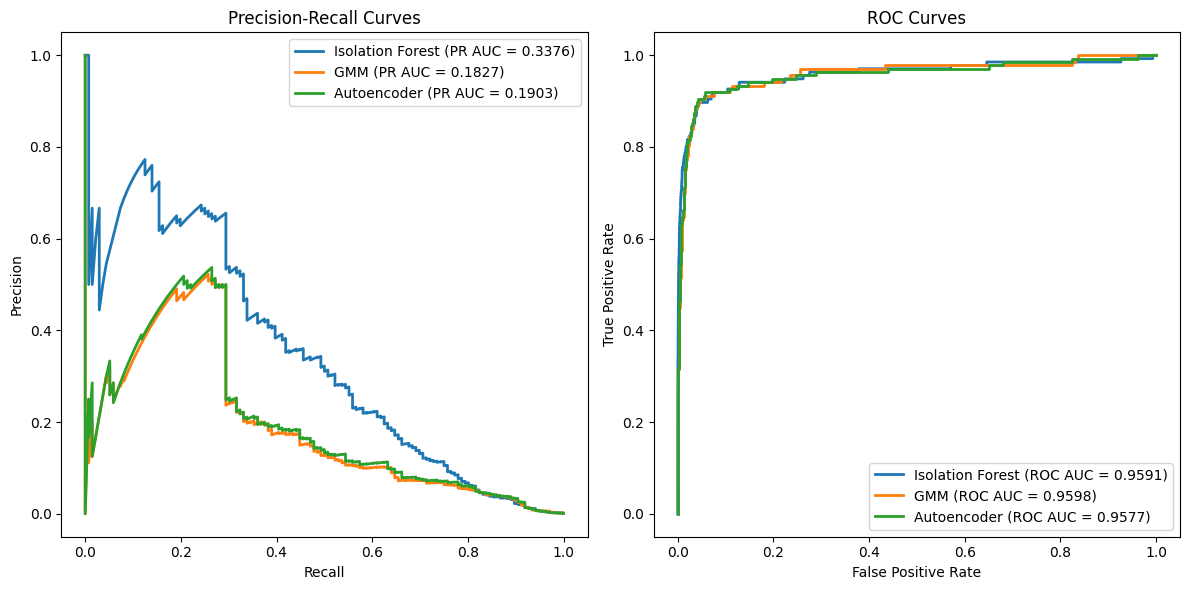

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, confusion_matrix, classification_report, auc, roc_curve, roc_auc_score

# Define a function to plot precision-recall curve
def plot_precision_recall_curve(y_true, y_scores, model_name):
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    plt.plot(recall, precision, lw=2, label=f'{model_name} (PR AUC = {auc(recall, precision):.4f})')

# Define a function to plot ROC curve
def plot_roc_curve(y_true, y_scores, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (ROC AUC = {roc_auc_score(y_true, y_scores):.4f})')

# Define a function to calculate and print confusion matrix and classification report
def evaluate_model(y_true, y_scores, model_name, threshold):
    y_pred = (y_scores >= threshold).astype(int)
    print(f'{model_name} Classification Report:')
    print(classification_report(y_true, y_pred))
    print(f'{model_name} Confusion Matrix:')
    print(confusion_matrix(y_true, y_pred))
    return y_pred

# Evaluate each model and plot confusion matrix
threshold_iforest = np.percentile(y_test_scores_iforest, 98)
#threshold_ocsvm = np.percentile(y_test_scores_ocsvm, 98)
threshold_gmm = np.percentile(y_test_scores_gmm, 98)
threshold_autoencoder = np.percentile(mse, 98)

y_pred_iforest = (y_test_scores_iforest >= threshold_iforest).astype(int)
#y_pred_ocsvm = (y_test_scores_ocsvm >= threshold_ocsvm).astype(int)
y_pred_gmm = (y_test_scores_gmm >= threshold_gmm).astype(int)
y_pred_autoencoder = (mse >= threshold_autoencoder).astype(int)

# Evaluate models and plot precision-recall curves
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Precision-Recall Curves')
# Isolation Forest
y_pred_iforest = evaluate_model(y_test, y_test_scores_iforest, 'Isolation Forest', threshold_iforest)
plot_precision_recall_curve(y_test, y_test_scores_iforest, 'Isolation Forest')

# OCSVM
#y_pred_ocsvm = evaluate_model(y_test, y_test_scores_ocsvm, 'OCSVM', threshold_ocsvm)
#plot_precision_recall_curve(y_test, y_test_scores_ocsvm, 'OCSVM')

# GMM
y_pred_gmm = evaluate_model(y_test, y_test_scores_gmm, 'GMM', threshold_gmm)
plot_precision_recall_curve(y_test, y_test_scores_gmm, 'GMM')

# Autoencoder
y_pred_autoencoder = evaluate_model(y_test, mse, 'Autoencoder', threshold_autoencoder)
plot_precision_recall_curve(y_test, mse, 'Autoencoder')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')

# Plot ROC curves
plt.subplot(1, 2, 2)
plt.title('ROC Curves')

# Isolation Forest
plot_roc_curve(y_test, y_test_scores_iforest, 'Isolation Forest')

# OCSVM
#plot_roc_curve(y_test, y_test_scores_ocsvm, 'OCSVM')

# GMM
plot_roc_curve(y_test, y_test_scores_gmm, 'GMM')

# Autoencoder
plot_roc_curve(y_test, mse, 'Autoencoder')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


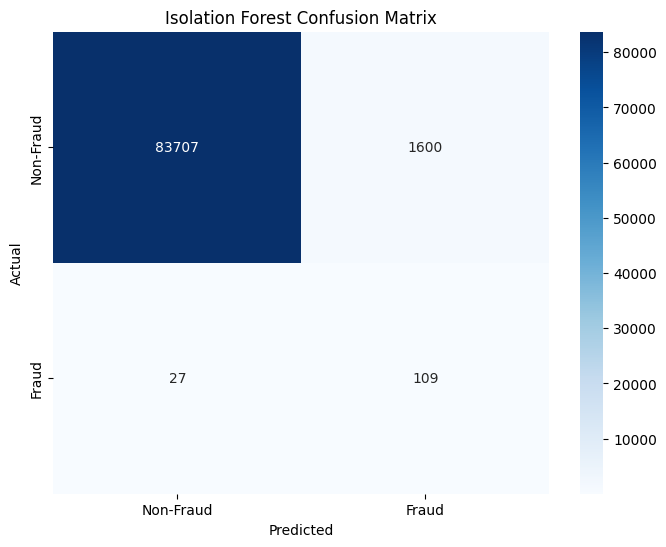

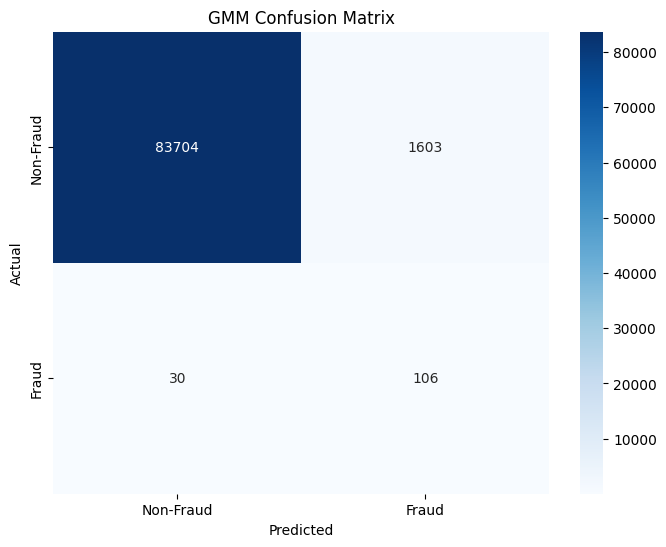

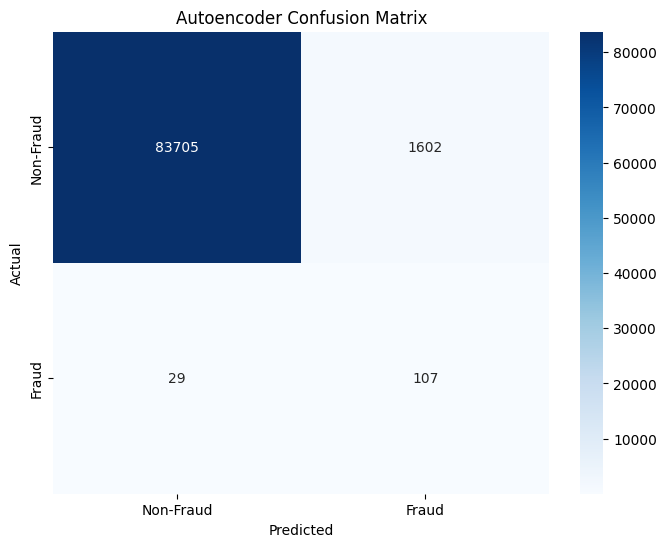

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define a function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()


# Plot confusion matrices
plot_confusion_matrix(y_test, y_pred_iforest, 'Isolation Forest')
#plot_confusion_matrix(y_test, y_pred_ocsvm, 'OCSVM')
plot_confusion_matrix(y_test, y_pred_gmm, 'GMM')
plot_confusion_matrix(y_test, y_pred_autoencoder, 'Autoencoder')


### Explainability Techniques

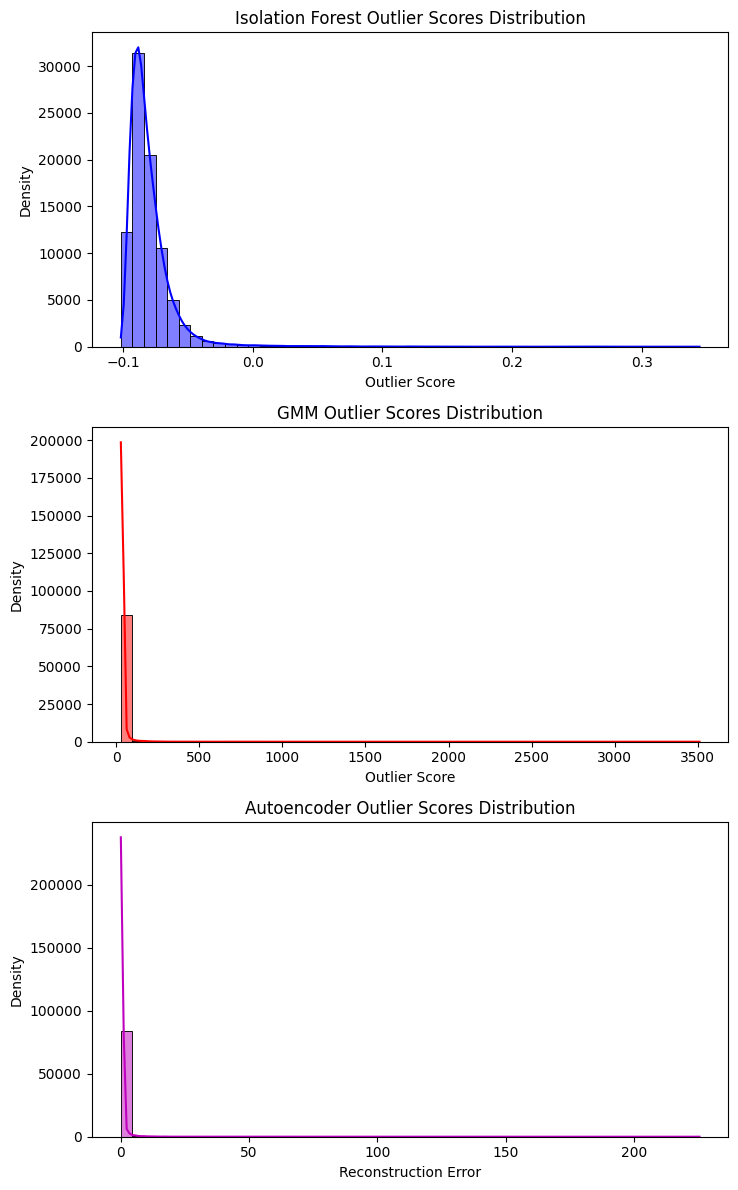

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for each model
plt.figure(figsize=(14, 12))

# Isolation Forest
plt.subplot(3, 2, 1)
sns.histplot(y_test_scores_iforest, kde=True, color='b', bins=50)
plt.title('Isolation Forest Outlier Scores Distribution')
plt.xlabel('Outlier Score')
plt.ylabel('Density')

# OCSVM
#plt.subplot(3, 2, 2)
#sns.histplot(y_test_scores_ocsvm, kde=True, color='g', bins=50)
#plt.title('OCSVM Outlier Scores Distribution')
#plt.xlabel('Outlier Score')
#plt.ylabel('Density')

# GMM
plt.subplot(3, 2, 3)
sns.histplot(y_test_scores_gmm, kde=True, color='r', bins=50)
plt.title('GMM Outlier Scores Distribution')
plt.xlabel('Outlier Score')
plt.ylabel('Density')

# Autoencoder
plt.subplot(3, 2, 5)
sns.histplot(mse, kde=True, color='m', bins=50)
plt.title('Autoencoder Outlier Scores Distribution')
plt.xlabel('Reconstruction Error')
plt.ylabel('Density')

plt.tight_layout()
plt.show()


### Applying Explainability techniques on the Isolation Forest Model

### SHAP Explainer

In [ ]:
# Initialize SHAP explainer with the trained Isolation Forest model
explainer = shap.Explainer(iforest.decision_function, X_train)

# Calculate SHAP values
shap_values = explainer(X_test)

# Summary plot (overall feature importance)
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Summary plot (detailed impact of features)
shap.summary_plot(shap_values, X_test)

### Principal Component Analysis

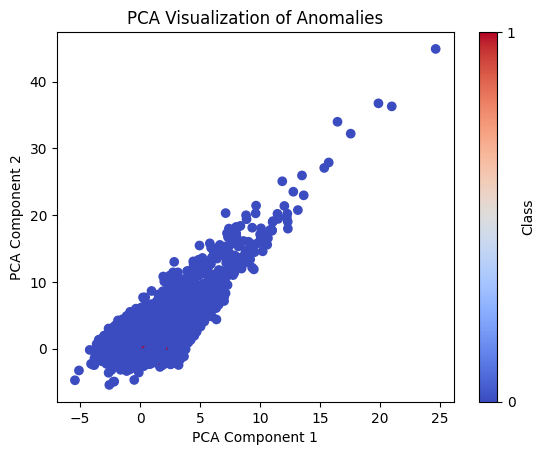

In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensions to 2 using PCA for visualization
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

# Scatter plot of the PCA-reduced test data, color-coded by true class
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='coolwarm')
plt.title("PCA Visualization of Anomalies")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Class', ticks=[0, 1])
plt.show()


### t-Distributed Stochastic Neighbor Embedding Visualization

In [ ]:
from sklearn.manifold import TSNE

# Reduce dimensions to 2 using t-SNE for visualization
tsne = TSNE(n_components=2)
X_test_tsne = tsne.fit_transform(X_test)

# Scatter plot of the t-SNE-reduced test data, color-coded by true class
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=y_test, cmap='coolwarm')
plt.title("t-SNE Visualization of Anomalies")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.colorbar(label='Class', ticks=[0, 1])
plt.show()


### LIME (Local interpretable Model -gnostic Explanations) Visualization

In [ ]:
import lime
import lime.lime_tabular

# Create a LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, mode='regression')

# Explain a prediction (example)
exp = explainer.explain_instance(X_test[0], iforest.predict, num_features=5)
exp.show_in_notebook(show_table=True)


### Impact of missing values on Isolation Forest

In [49]:
from sklearn.impute import SimpleImputer
# Introduce missing values randomly
missing_rate = 0.1
np.random.seed(42)
data_missing = df.copy()
mask = np.random.rand(*df.shape) < missing_rate
data_missing[mask] = np.nan

# Impute missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data_missing), columns=df.columns)

In [50]:
# Split the dataset into features and target
X = data_imputed.drop('Class', axis=1)
y = data_imputed['Class']
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [51]:
# Set up the Isolation Forest model with the best parameters
iforest = IForest(contamination=0.01, max_samples=0.5, n_estimators=50)

# Fit the model on the training data
iforest.fit(X_train)

# Predict outlier scores
y_test_scores_iforest = iforest.decision_function(X_test)

# Predict binary outlier labels
y_test_pred_iforest = iforest.predict(X_test)
y_test_pred_iforest = [1 if x == 1 else 0 for x in y_test_pred_iforest]  # Converting to binary labels

# Convert y_test to binary
y_test_binary = (y_test > 0.5).astype(int)


In [53]:
from pyod.models.gmm import GMM

# Set up the GMM model with the best parameters
gmm = GMM(contamination=0.001, covariance_type='full', n_components=1)

# Fit the model on the training data
gmm.fit(X_train)


# Predict outlier scores
y_test_scores_gmm = gmm.decision_function(X_test)

# Predict binary outlier labels
y_test_pred_gmm= gmm.predict(X_test)
y_test_pred_gmm = [1 if x == 1 else 0 for x in y_test_pred_gmm]  # Converting to binary labels

# Convert y_test to binary
y_test_binary = (y_test > 0.5).astype(int)



In [54]:
import numpy as np
import pandas as pd
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Define the autoencoder model
input_dim = X_train.shape[1]
encoding_dim = 14  
hidden_dim = int(encoding_dim / 2)

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="relu")(input_layer)
encoder = Dense(hidden_dim, activation="relu")(encoder)
decoder = Dense(hidden_dim, activation="relu")(encoder)
decoder = Dense(input_dim, activation="sigmoid")(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the autoencoder
history = autoencoder.fit(X_train, X_train, 
                          epochs=50, 
                          batch_size=32, 
                          shuffle=True, 
                          validation_split=0.2,
                          verbose=1)

# Predict the reconstruction of the test set
X_test_reconstructed = autoencoder.predict(X_test)

# Calculate reconstruction error
mse = np.mean(np.power(X_test - X_test_reconstructed, 2), axis=1)

Epoch 1/50
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 0.9607 - val_loss: 0.8847
Epoch 2/50
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.8791 - val_loss: 0.8638
Epoch 3/50
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.8287 - val_loss: 0.8538
Epoch 4/50
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.8373 - val_loss: 0.8503
Epoch 5/50
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.8209 - val_loss: 0.8482
Epoch 6/50
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.8406 - val_loss: 0.8449
Epoch 7/50
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.8375 - val_loss: 0.8428
Epoch 8/50
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.8512 - val_loss: 0.8421
Epoch 9/50
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.8376 - val_loss: 0.8414
Epoch 10/50
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.8305 - val_loss: 0.8407
Epoch 11/50
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.8397 - val_loss: 0.8399
Epoch 12/50
4985/49

Isolation Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85315
           1       0.06      0.83      0.12       128

    accuracy                           0.98     85443
   macro avg       0.53      0.90      0.55     85443
weighted avg       1.00      0.98      0.99     85443

Isolation Forest Confusion Matrix:
[[83712  1603]
 [   22   106]]
GMM Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85315
           1       0.06      0.74      0.10       128

    accuracy                           0.98     85443
   macro avg       0.53      0.86      0.55     85443
weighted avg       1.00      0.98      0.99     85443

GMM Confusion Matrix:
[[83701  1614]
 [   33    95]]
Autoencoder Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85315
           1    

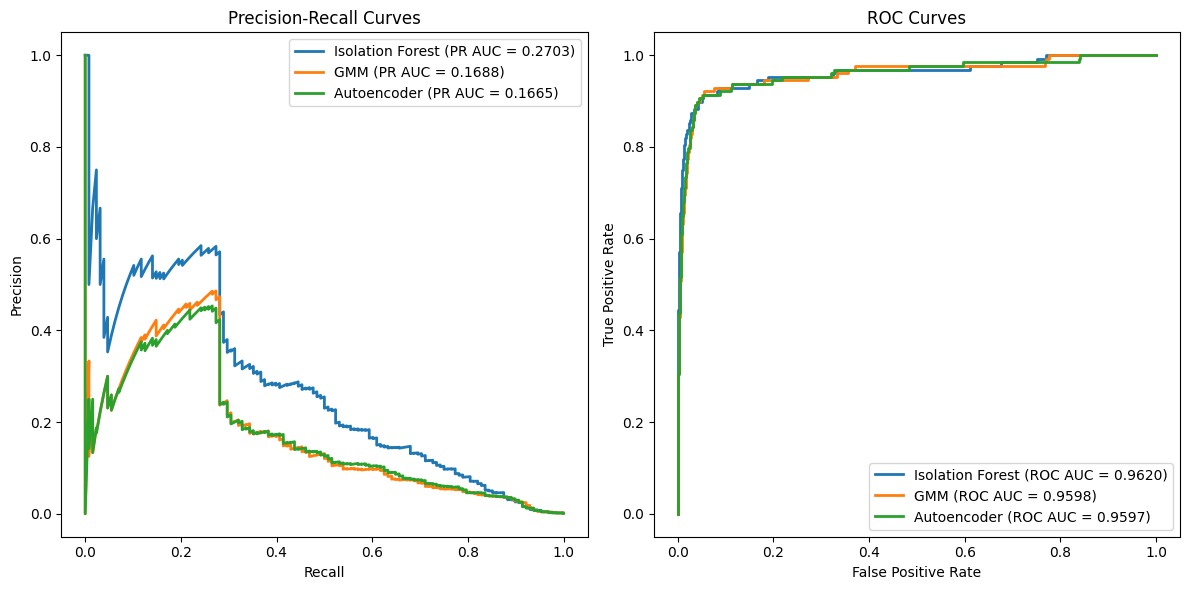

In [55]:
# Define a function to plot precision-recall curve
def plot_precision_recall_curve(y_true, y_scores, model_name):
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    plt.plot(recall, precision, lw=2, label=f'{model_name} (PR AUC = {auc(recall, precision):.4f})')

# Define a function to plot ROC curve
def plot_roc_curve(y_true, y_scores, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (ROC AUC = {roc_auc_score(y_true, y_scores):.4f})')

# Define a function to calculate and print confusion matrix and classification report
def evaluate_model(y_true, y_scores, model_name, threshold):
    y_pred = (y_scores >= threshold).astype(int)
    print(f'{model_name} Classification Report:')
    print(classification_report(y_true, y_pred))
    print(f'{model_name} Confusion Matrix:')
    print(confusion_matrix(y_true, y_pred))
    return y_pred

# Evaluate each model and plot confusion matrix
threshold_iforest = np.percentile(y_test_scores_iforest, 98)
threshold_gmm = np.percentile(y_test_scores_gmm, 98)
threshold_autoencoder = np.percentile(mse, 98)

# Evaluate models and plot precision-recall curves
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Precision-Recall Curves')
# Isolation Forest
y_pred_iforest = evaluate_model(y_test_binary, y_test_scores_iforest, 'Isolation Forest', threshold_iforest)
plot_precision_recall_curve(y_test_binary, y_test_scores_iforest, 'Isolation Forest')

# GMM
y_pred_gmm = evaluate_model(y_test_binary, y_test_scores_gmm, 'GMM', threshold_gmm)
plot_precision_recall_curve(y_test_binary, y_test_scores_gmm, 'GMM')

# Autoencoder
y_pred_autoencoder = evaluate_model(y_test_binary, mse, 'Autoencoder', threshold_autoencoder)
plot_precision_recall_curve(y_test_binary, mse, 'Autoencoder')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')

# Plot ROC curves
plt.subplot(1, 2, 2)
plt.title('ROC Curves')

# Isolation Forest
plot_roc_curve(y_test_binary, y_test_scores_iforest, 'Isolation Forest')

# GMM
plot_roc_curve(y_test_binary, y_test_scores_gmm, 'GMM')

# Autoencoder
plot_roc_curve(y_test_binary, mse, 'Autoencoder')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

### Balancing of datasets experimentation

In [45]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import NearMiss
from collections import Counter
X = df.drop(columns=['Class'])
y = df['Class']
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to balance the dataset
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f'Original dataset shape {Counter(y_train)}')
print(f'Resampled dataset shape {Counter(y_train_smote)}')



Original dataset shape Counter({0: 227451, 1: 394})
Resampled dataset shape Counter({0: 227451, 1: 227451})


In [46]:
from pyod.models.iforest import IForest
from pyod.models.gmm import GMM
from pyod.models.auto_encoder import AutoEncoder

# Isolation Forest
iforest = IForest(contamination=0.01, max_samples=0.5, n_estimators=50)
iforest.fit(X_train_nearmiss)
y_test_scores_iforest = iforest.decision_function(X_test)

# GMM
gmm = GMM(contamination=0.01, covariance_type='full', n_components=1)
gmm.fit(X_train_nearmiss)
y_test_scores_gmm = gmm.decision_function(X_test)



In [47]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc

def evaluate_at_threshold(scores, threshold, y_test, model_name):
    y_pred = (scores > threshold).astype(int)
    print(f'Classification Report at threshold {threshold:.4f} for {model_name}:')
    print(classification_report(y_test, y_pred))
    print(f'Confusion Matrix at threshold {threshold:.4f} for {model_name}:')
    print(confusion_matrix(y_test, y_pred))

# Use threshold 0.98 for evaluation
threshold = 0.98

threshold_iforest = np.quantile(y_test_scores_iforest, threshold)
threshold_gmm = np.quantile(y_test_scores_gmm, threshold)
#threshold_autoencoder = np.quantile(y_test_scores_autoencoder, threshold)

print(f'Threshold 0.98 -> Thresholds:')
print(f'Isolation Forest: {threshold_iforest:.4f}')
print(f'GMM: {threshold_gmm:.4f}')
#print(f'Autoencoder: {threshold_autoencoder:.4f}')

evaluate_at_threshold(y_test_scores_iforest, threshold_iforest, y_test, 'Isolation Forest')
evaluate_at_threshold(y_test_scores_gmm, threshold_gmm, y_test, 'GMM')
#evaluate_at_threshold(y_test_scores_autoencoder, threshold_autoencoder, y_test, 'Autoencoder')


Threshold 0.98 -> Thresholds:
Isolation Forest: -0.1275
GMM: 402.9829
Classification Report at threshold -0.1275 for Isolation Forest:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.02      0.27      0.04        98

    accuracy                           0.98     56962
   macro avg       0.51      0.62      0.52     56962
weighted avg       1.00      0.98      0.99     56962

Confusion Matrix at threshold -0.1275 for Isolation Forest:
[[55750  1114]
 [   72    26]]
Classification Report at threshold 402.9829 for GMM:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.00      0.00      0.00        98

    accuracy                           0.98     56962
   macro avg       0.50      0.49      0.49     56962
weighted avg       1.00      0.98      0.99     56962

Confusion Matrix at threshold 402.9829 for GMM:
[[55724  1140]
 [  

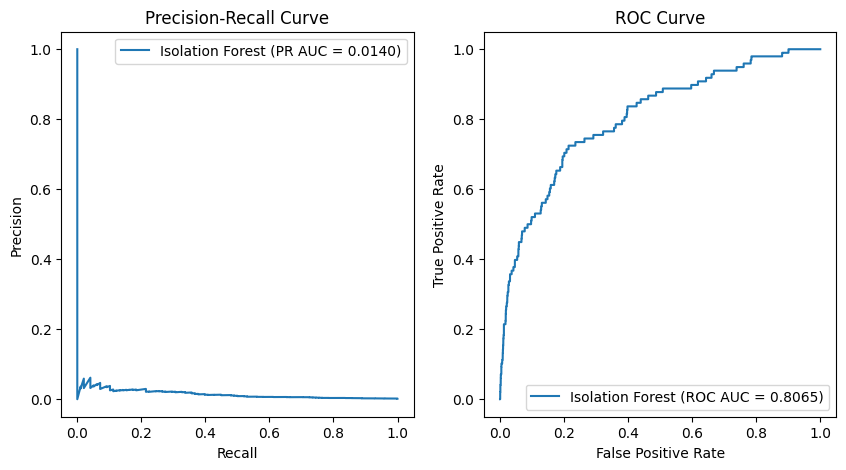

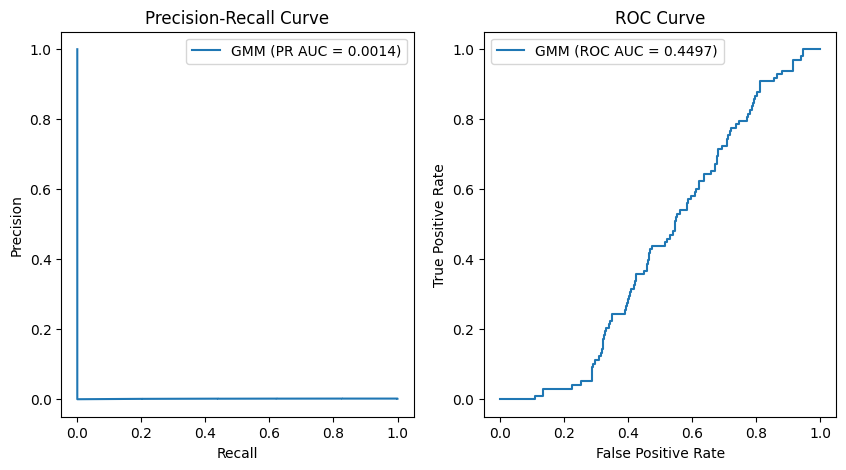

In [48]:
import matplotlib.pyplot as plt

def plot_curves(y_test, y_test_scores, model_name):
    precision, recall, _ = precision_recall_curve(y_test, y_test_scores)
    roc_auc = roc_auc_score(y_test, y_test_scores)
    pr_auc = auc(recall, precision)
    
    plt.figure(figsize=(10, 5))
    
    # Precision-Recall Curve
    plt.subplot(1, 2, 1)
    plt.plot(recall, precision, label=f'{model_name} (PR AUC = {pr_auc:.4f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_test_scores)
    plt.subplot(1, 2, 2)
    plt.plot(fpr, tpr, label=f'{model_name} (ROC AUC = {roc_auc:.4f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    
    plt.show()

# Plot for Isolation Forest
plot_curves(y_test, y_test_scores_iforest, 'Isolation Forest')

# Plot for GMM
plot_curves(y_test, y_test_scores_gmm, 'GMM')


